In [4]:
%pylab inline
import pandas as pd
import seaborn as sns
from io import StringIO
import json
import plotly.express as px
import ipywidgets as widgets
from datetime import datetime,date
import pytz
import matplotlib.dates as mdates
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pickle


Populating the interactive namespace from numpy and matplotlib


/Users/annette/.pyenv/versions/3.8.1/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning:

pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy



In [211]:
folder = "data/energy/"


# 2020 data 
with open(folder+'it_2020_gen.pkl', 'rb') as file:
    it_2020_gen = pickle.load(file)
    it_2020_gen.index = it_2020_gen.index.tz_localize(None)
with open(folder+'it_2020_load.pkl', 'rb') as file:
    it_2020_load = pickle.load(file)
    it_2020_load.index = it_2020_load.index.tz_localize(None)
with open(folder+'it_2020_exports.pkl', 'rb') as file:
    it_2020_exports = pickle.load(file)
    it_2020_exports.index = it_2020_exports.index.tz_localize(None)
with open(folder+'it_2020_imports.pkl', 'rb') as file:
    it_2020_imports = pickle.load(file)
    it_2020_imports.index = it_2020_imports.index.tz_localize(None)
    
# 2019 data
with open(folder+'it_2019_gen.pkl', 'rb') as file:
    it_2019_gen = pickle.load(file)
    it_2019_gen.index = it_2019_gen.index.tz_localize(None)
with open(folder+'it_2019_load.pkl', 'rb') as file:
    it_2019_load = pickle.load(file)
    it_2019_load.index = it_2019_load.index.tz_localize(None)
with open(folder+'it_2019_exports.pkl', 'rb') as file:
    it_2019_exports = pickle.load(file)
    it_2019_exports.index = it_2019_exports.index.tz_localize(None)
with open(folder+'it_2019_imports.pkl', 'rb') as file:
    it_2019_imports = pickle.load(file)
    it_2019_imports.index = it_2019_imports.index.tz_localize(None)


# Daily Load patterns

In [68]:

def daily_pattern(df1,df2, title):
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=df1.index, y=df1['actual'], line=dict(color='royalblue', width=2),
                                name="actual (before lockdown)"))
    fig.add_trace(go.Scatter(x=df1.index, y=df1['day-ahead'], line=dict(color='royalblue', width=2, dash='dash'),
                                name="day-ahead (before lockdown)"))
    fig.add_trace(go.Scatter(x=df2.index, y=df2['actual'], line=dict(color='green', width=2),
                                name="actual (during lockdown)"))
    fig.add_trace(go.Scatter(x=df2.index, y=df2['day-ahead'], line=dict(color='green', width=2,  dash='dash'),
                                name="day-ahead (during lockdown)"))
    fig.update_layout(
            title={
                'text': title,
                'y':0.9,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})
    fig.show()


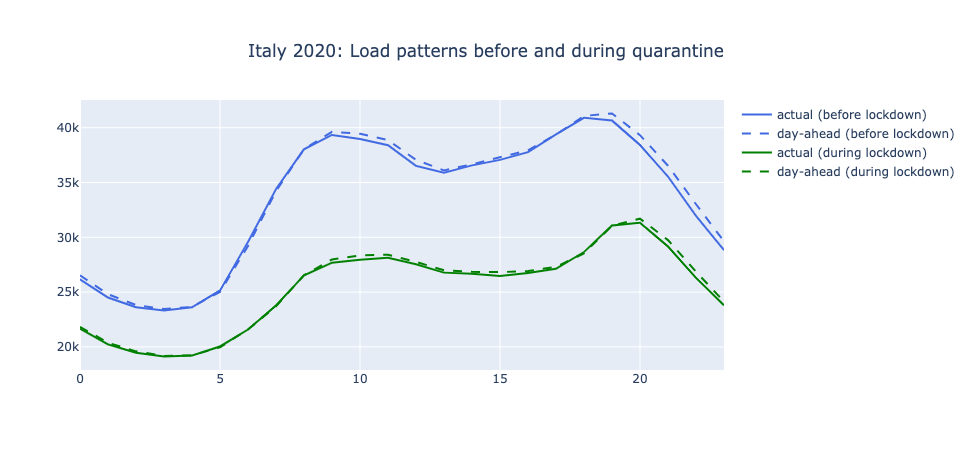

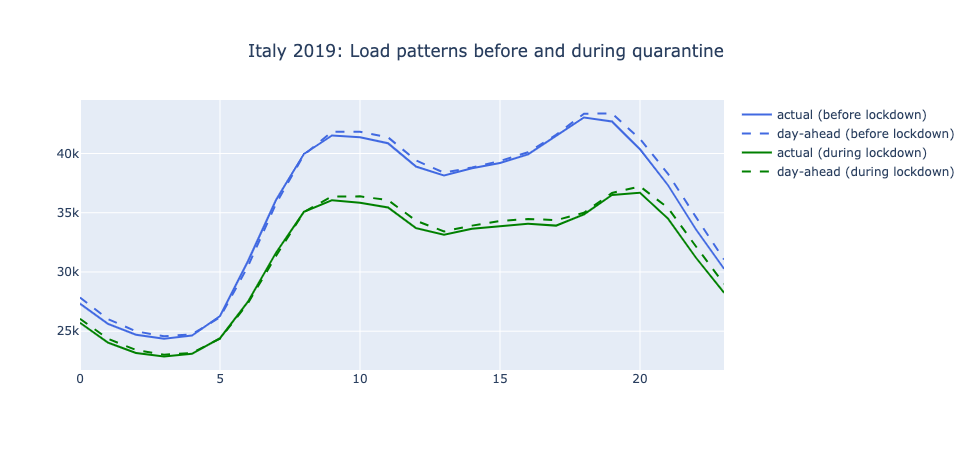

In [69]:

it_2020_load
title20 = "Italy 2020: Load patterns before and during quarantine"
df201 = it_2020_load.loc[(it_2020_load.index < datetime(2020,3,9))]
df201 = df201.groupby(df201.index.hour).mean()
df202 = it_2020_load.loc[(it_2020_load.index >= datetime(2020,3,9)) & (it_2020_load.index <= datetime(2020,5,3))]
df202 = df202.groupby(df202.index.hour).mean()
daily_pattern(df201,df202, title20)

title19 = "Italy 2019: Load patterns before and during quarantine"
df191 = it_2019_load.loc[(it_2019_load.index < datetime(2019,3,9))]
df191 = df191.groupby(df191.index.hour).mean()
df192 = it_2019_load.loc[(it_2019_load.index >= datetime(2019,3,9)) & (it_2019_load.index <= datetime(2019,5,10))]
df192 = df192.groupby(df192.index.hour).mean()
daily_pattern(df191,df192, title19)

# Load

In [70]:
def timeline(df, title, with_annotation=True):
    df_daily = df.resample('D', label='left').sum()
    df_daily = df_daily[:-1]
    # Add traces
    i = 0
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=df_daily.index, y=df_daily["day-ahead"],
                             line=dict(color='coral', width=2),
                            name="day-ahead"))
    fig.add_trace(go.Scatter(x=df_daily.index, y=df_daily["actual"],
                             line=dict(color='royalblue', width=2),
                             name="actual")) 
    
    df_weekly = df_daily.resample('W', label='left').mean()
    df_weekly = df_weekly[1:]
   
    fig.add_trace(go.Scatter(x=df_weekly.index, y=df_weekly["day-ahead"],
                             line=dict(color='coral', width=3, dash='dash'),
                            name="day-ahead (weekly mean)"))
    fig.add_trace(go.Scatter(x=df_weekly.index, y=df_weekly["actual"],
                             line=dict(color='royalblue', width=3, dash='dash'),
                            name="actual (weekly mean)"))  
    if with_annotation: 
        fig.add_annotation(x=datetime(2020,3,9),y=200000,text="lockdown",ax=0,ay=-350, arrowcolor="#636363", opacity=0.8)
    fig.update_layout(title={
        'text': title,
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
    fig.show()

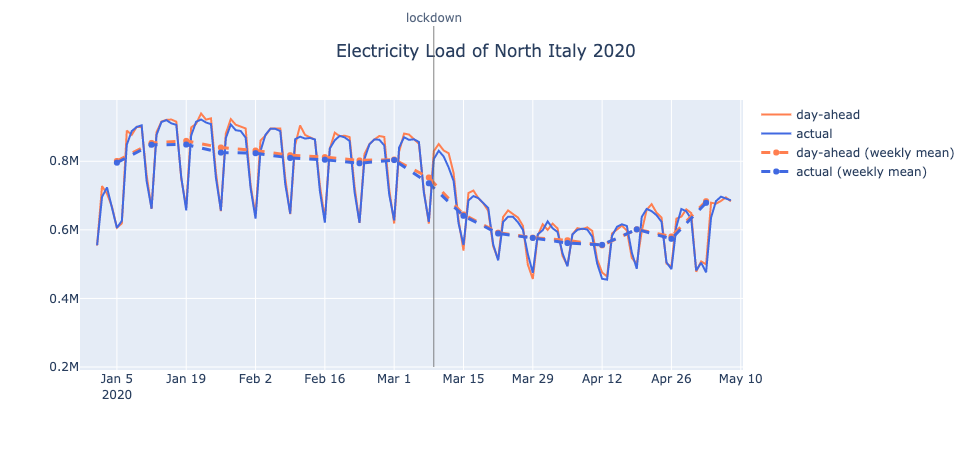

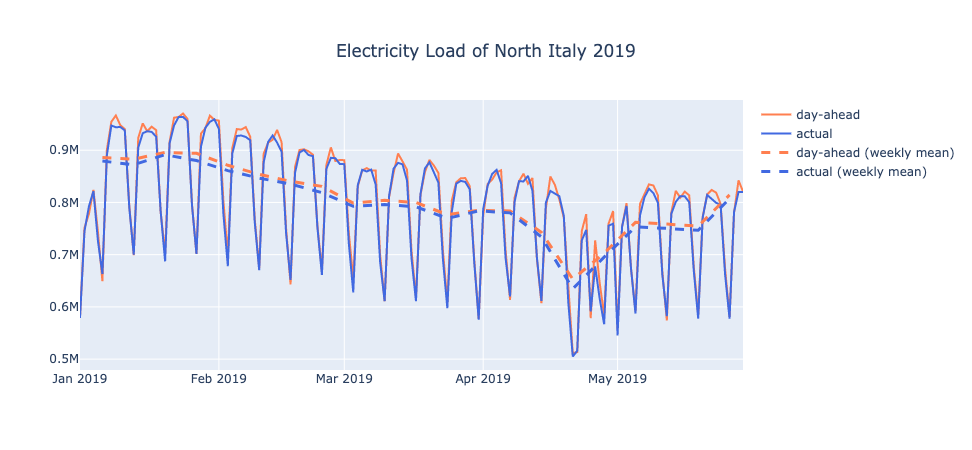

In [71]:

timeline(it_2020_load, title="Electricity Load of North Italy 2020")
df19 = it_2019_load.loc['2019-01-01':'2019-05-30']
timeline(df19, title="Electricity Load of North Italy 2019", with_annotation= False)

# Generation

In [72]:
it_2020_gen.head()

,Biomass,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,Hydro Run-of-river and poundage,Hydro Water Reservoir,Solar,Waste,Wind Onshore,Other
2020-01-01 00:00:00,637,585,8485,1378,34,661,3270,495,1,48,2441,1633
2020-01-01 01:00:00,638,586,8137,1382,34,661,2911,421,0,47,2550,1579
2020-01-01 02:00:00,639,588,8206,1418,34,661,2554,470,1,46,2576,1483
2020-01-01 03:00:00,642,589,7761,1426,34,662,2442,398,0,48,3134,1378
2020-01-01 04:00:00,648,586,7252,1399,34,662,2419,376,0,49,3682,1384


In [74]:

def makePie(df1, df2, title1, title2, year):

    df1 = df1.mean()
    df2 = df2.mean()
    fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

    fig.add_trace(go.Pie(labels=df1.index, values=df1.values, title=title1),
                  row=1, col=1)
    fig.add_trace(go.Pie(labels=df2.index, values=df2.values, title=title2),
                  row=1, col=2)
    # fig.add_trace(go.Bar(x=[1, 2, 3], y=[2, 3, 5],
    #                     marker=dict(color=[2, 3, 5], coloraxis="coloraxis")),
    #               1, 2)
    
    
    fig.update_layout(
        title={
            'text': "Italian Energy Mix: "+year,
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
    fig.show()
    return fig



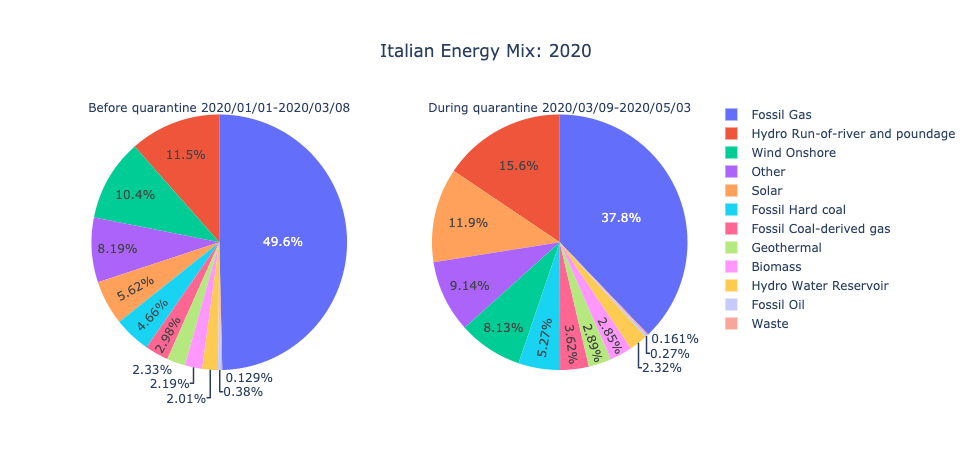

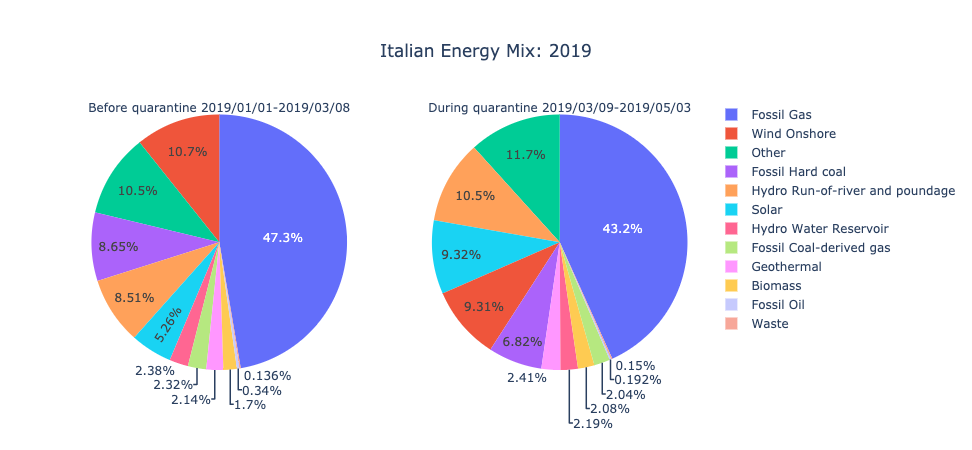

In [75]:

title1 = "Before quarantine 2020/01/01-2020/03/08"
title2 = "During quarantine 2020/03/09-2020/05/03"
df1 = it_2020_gen.loc[(it_2020_gen.index < datetime(2020,3,9))]
df2 = it_2020_gen.loc[(it_2020_gen.index >= datetime(2020,3,9)) & (it_2020_gen.index <= datetime(2020,5,3))]
fig20 = makePie(df1, df2, title1, title2,"2020")


title1 = "Before quarantine 2019/01/01-2019/03/08"
title2 = "During quarantine 2019/03/09-2019/05/03"
df1 = it_2019_gen.loc[(it_2019_gen.index < datetime(2019,3,9))]
df2 = it_2019_gen.loc[(it_2019_gen.index >= datetime(2019,3,9)) & (it_2019_gen.index <= datetime(2019,5,3))]
fig19 = makePie(df1, df2, title1, title2, "2019")

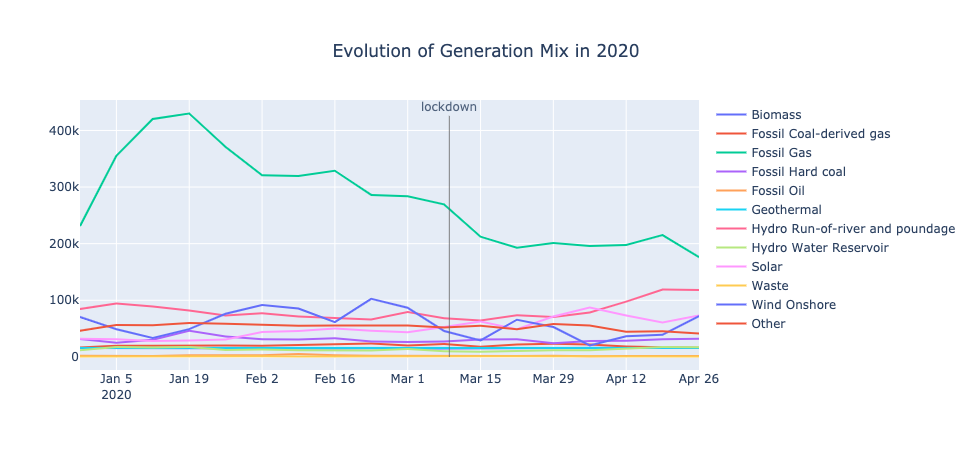

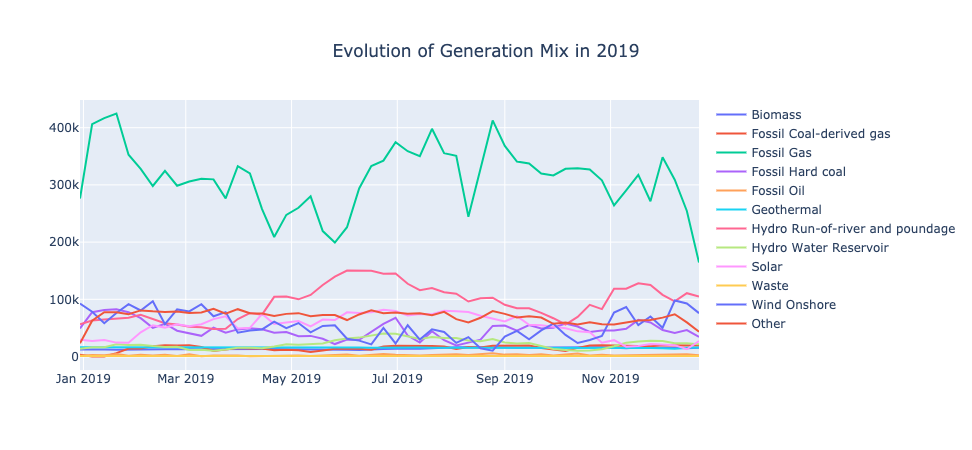

In [85]:
def gen_evol(df, year):
    df20_daily = df.resample('D', label='left').sum()
    df_weekly = df20_daily.resample('W', label='left').mean()

    df_weekly = df_weekly[:-1]

    # Add traces
    i = 0
    fig = go.Figure()

    for c in df20.columns:
        fig.add_trace(go.Scatter(x=df_weekly.index, y=df_weekly[c],
                            mode='lines',
                            name=c))
    if (year == "2020"):
        fig.add_annotation(x=datetime(2020,3,9),y=0,text="lockdown",ax=0,ay=-250, arrowcolor="#636363", opacity=0.8)
    fig.update_layout(
            title={
                'text': "Evolution of Generation Mix in "+year,
                'y':0.9,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})
    fig.show()
    
gen_evol(it_2020_gen, year="2020")
gen_evol(it_2019_gen, year="2019")




# Generation vs Load

In [158]:
def gen_vs_load(gen, load, year):
    fig = go.Figure()
    gen_daily = gen.resample('D', label='left').sum()
    gen_weekly = gen_daily.resample('W', label='left').mean()
    gen_weekly['total'] = gen_weekly.sum(axis=1)
    gen_weekly = gen_weekly[0:-1]
    
    fig.add_trace(go.Scatter(x=gen_weekly.index, y=gen_weekly['total'],
                        mode='lines',
                        name='generation'))

    load_daily = load.resample('D', label='left').sum()
    load_weekly = load_daily.resample('W', label='left').mean()

    load_weekly = load_weekly[:-1]
    fig.add_trace(go.Scatter(x=load_weekly.index, y=load_weekly['actual'],
                        mode='lines',
                        name='load'))
    fig.update_layout(
            title={
                'text': "Italy: Generation vs Load for "+ year,
                'y':0.9,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})
    if year == "2020":
        fig.add_annotation(x=datetime(2020,3,9),y=450000,text="lockdown",ax=0,ay=-250, arrowcolor="#636363", opacity=0.8)
    fig.show()

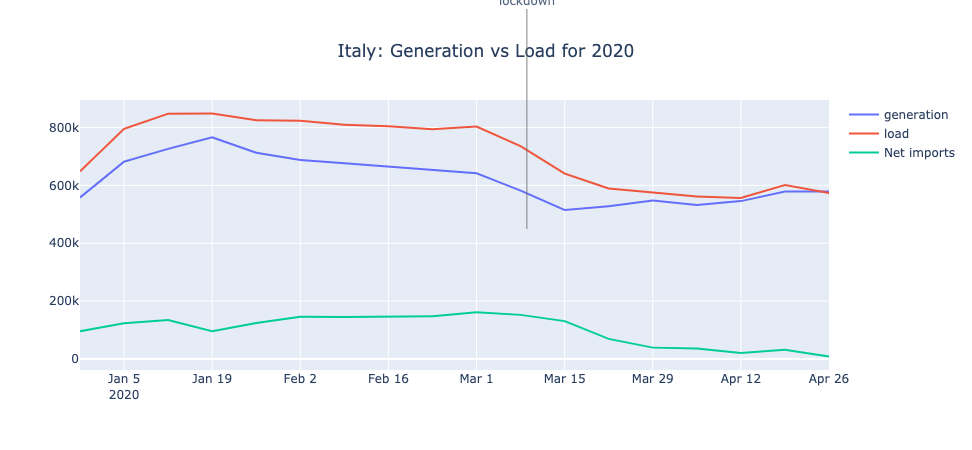

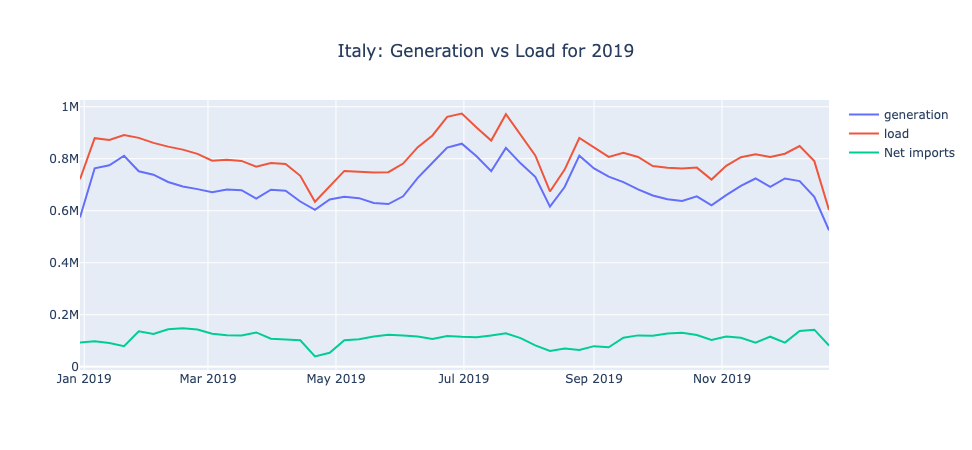

In [159]:
gen_vs_load(it_2020_gen, it_2020_load, it_2020_imports, it_2020_exports, "2020")
gen_vs_load(it_2019_gen, it_2019_load, it_2019_imports, it_2019_exports, "2019")

# Imports vs Exports

In [161]:
def gen_vs_load(imports, exports, year):
    fig = go.Figure()
    imports_daily = imports.resample('D', label='left').sum()
    imports_weekly = imports_daily.resample('W', label='left').mean()
    imports_weekly['total'] = imports_weekly.sum(axis=1)
    imports_weekly = imports_weekly[0:-1]
    
    fig.add_trace(go.Scatter(x=imports_weekly.index, y=imports_weekly['total'],
                        mode='lines',
                        name='imports'))

    exports_daily = exports.resample('D', label='left').sum()
    exports_weekly = exports_daily.resample('W', label='left').mean()
    exports_weekly['total'] = exports_weekly.sum(axis=1)
    exports_weekly = exports_weekly[0:-1]
    
    fig.add_trace(go.Scatter(x=exports_weekly.index, y=exports_weekly['total'],
                        mode='lines',
                        name='exports'))

    fig.update_layout(
            title={
                'text': "Italy: Imports vs exports for "+ year,
                'y':0.9,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})

    if year == "2020":
        fig.add_annotation(x=datetime(2020,3,9),y=0,text="lockdown",ax=0,ay=-280, arrowcolor="#636363", opacity=0.8)

    fig.show()

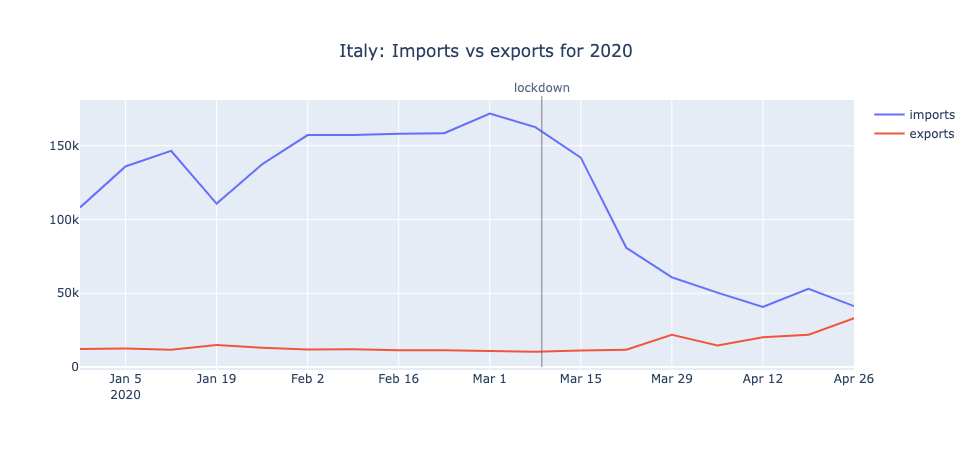

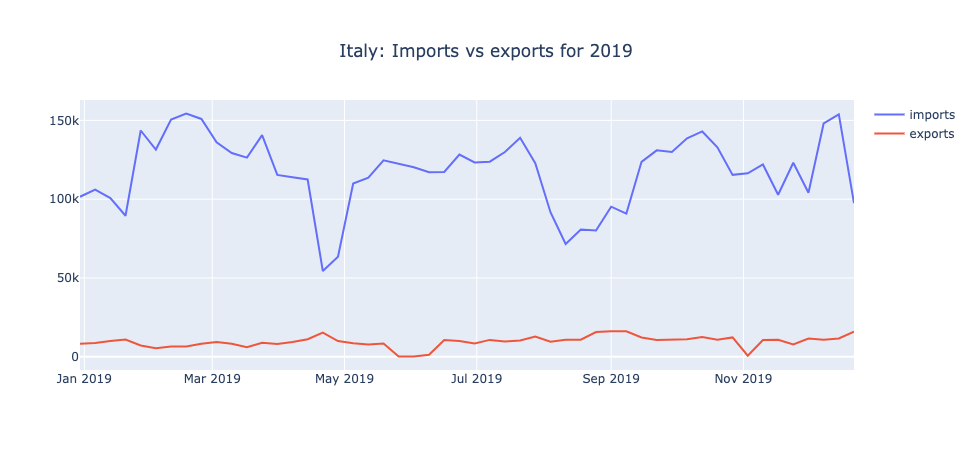

In [163]:
gen_vs_load(it_2020_imports, it_2020_exports, "2020")
gen_vs_load(it_2019_imports, it_2019_exports, "2019")

In [240]:
def gen_vs_load_vs_imports(gen, load, imports, exports, year):
    fig = go.Figure()
    
    # generation
    gen_daily = gen.resample('D', label='left').sum()
    gen_weekly = gen_daily.resample('W', label='left').mean()
    gen_weekly['total'] = gen_weekly.sum(axis=1)
    gen_weekly = gen_weekly[0:-1]
    
    imports_daily = imports.resample('D', label='left').sum()
    imports_weekly = imports_daily.resample('W', label='left').mean()
    imports_weekly['total'] = imports_weekly.sum(axis=1)
    imports_weekly = imports_weekly[0:-1]

    exports_daily = exports.resample('D', label='left').sum()
    exports_weekly = exports_daily.resample('W', label='left').mean()
    exports_weekly['total'] = exports_weekly.sum(axis=1)
    exports_weekly = exports_weekly[0:-1]
    
    
    fig.add_trace(go.Scatter(x=gen_weekly.index, y=gen_weekly['total'],
                        name='generation', 
                        stackgroup='one'))

    net_imports = imports_weekly-exports_weekly
    fig.add_trace(go.Scatter(x=net_imports.index, y=net_imports['total'],
                        name='Net imports',
                        stackgroup='one'))
    
    # load
    load_daily = load.resample('D', label='left').sum()
    load_weekly = load_daily.resample('W', label='left').mean()
    load_weekly = load_weekly[:-1]
    
    fig.add_trace(go.Scatter(x=load_weekly.index, y=load_weekly['actual'],
                    line=dict(color='black', width=2, dash='dash'),
                    name='load'))
    
    fig.update_layout(
            title={
                'text': "Italy: Generation vs Load for "+ year,
                'y':0.9,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})
    if year == "2020":
        fig.add_annotation(x=datetime(2020,3,9),y=0,text="lockdown",ax=0,ay=-250, arrowcolor="#636363", opacity=0.8)
    fig.show()

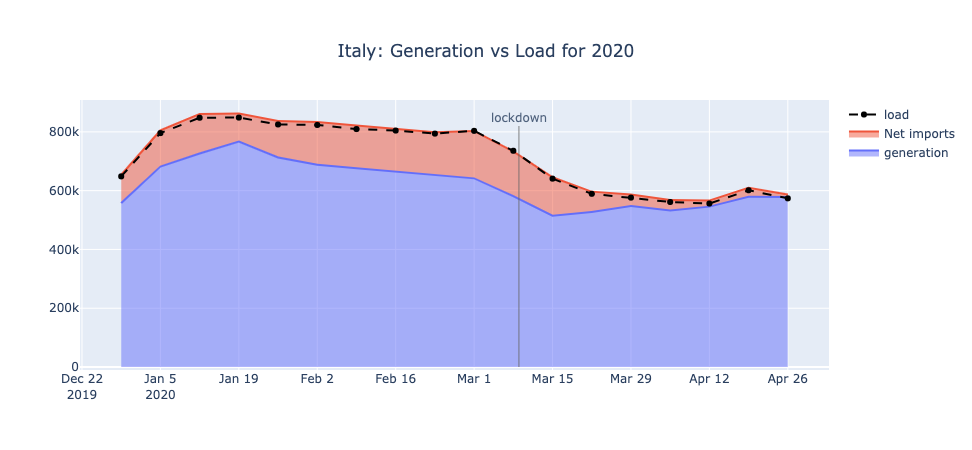

In [241]:
gen_vs_load_vs_imports(it_2020_gen, it_2020_load, it_2020_imports, it_2020_exports, "2020")


In [220]:
def gen_vs_load_vs_imports(gen, load, imports, exports, year):
    fig = go.Figure()
    
    countries=imports.columns

    fig = go.Figure(data=[
        go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]),
        go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
    ])
    # Change the bar mode
    fig.update_layout(barmode='stack')
    # load
    load_daily = load.resample('D', label='left').sum()
    load_weekly = load_daily.resample('W', label='left').mean()
    load_weekly = load_weekly[:-1]
    
    fig.add_trace(go.Scatter(x=load_weekly.index, y=load_weekly['actual'],
                    mode='lines',
                    name='load'))
    
    # generation
    gen_daily = gen.resample('D', label='left').sum()
    gen_weekly = gen_daily.resample('W', label='left').mean()
    gen_weekly['total'] = gen_weekly.sum(axis=1)
    gen_weekly = gen_weekly[0:-1]
    
    imports_daily = imports.resample('D', label='left').sum()
    imports_weekly = imports_daily.resample('W', label='left').mean()
    imports_weekly['total'] = imports_weekly.sum(axis=1)
    imports_weekly = imports_weekly[0:-1]

    exports_daily = exports.resample('D', label='left').sum()
    exports_weekly = exports_daily.resample('W', label='left').mean()
    exports_weekly['total'] = exports_weekly.sum(axis=1)
    exports_weekly = exports_weekly[0:-1]
    
    
    fig.add_trace(go.Scatter(x=gen_weekly.index, y=gen_weekly['total'],
                        name='generation', 
                        stackgroup='one'))

    net_imports = imports_weekly-exports_weekly
    fig.add_trace(go.Scatter(x=net_imports.index, y=net_imports['total'],
                        name='Net imports',
                        stackgroup='one'))
    
    fig.update_layout(
            title={
                'text': "Italy: Generation vs Load for "+ year,
                'y':0.9,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})
    if year == "2020":
        fig.add_annotation(x=datetime(2020,3,9),y=0,text="lockdown",ax=0,ay=-250, arrowcolor="#636363", opacity=0.8)
    fig.show()
    
#gen_vs_load_vs_imports(it_2020_gen, it_2020_load, it_2020_imports, it_2020_exports, "2020")
it_2020_imports.mean()
it_2020_exports.mean()

# imports = it_2020_imports.stack().reset_index(1)
# imports.columns = ["country", "import"]
# imports.group('country')
# fig = go.Figure([go.Bar(x="country", y=)])

# x=['b', 'a', 'c', 'd']
# fig = go.Figure(go.Bar(x=x, y=[2,5,1,9], name='Montreal'))
# fig.add_trace(go.Bar(x=x, y=[1, 4, 9, 16], name='Ottawa'))
# fig.add_trace(go.Bar(x=x, y=[6, 8, 4.5, 8], name='Toronto'))

# fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'})
# fig.show()
# #, col_fill="country")

fr    1900.438602
au     137.021802
ch    2316.446938
sl     379.579032
gr       8.146842
dtype: float64

In [210]:
it_2020_imports

2020-01-01 00:00:00  fr    1087
                     au     186
                     ch    1224
                     sl     741
                     gr       0
                           ... 
2020-05-09 23:00:00  fr    2169
                     au     152
                     ch       0
                     sl     255
                     gr       0
Length: 15595, dtype: int64